<a href="https://colab.research.google.com/github/preetamjumech/Banking_Data_DNN_from_scratch/blob/main/Preetam_Saha_Bank_marketing_UCI_DNN_30_08_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [56]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip

--2022-08-30 16:24:36--  https://archive.ics.uci.edu/ml/machine-learning-databases/00222/bank.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 579043 (565K) [application/x-httpd-php]
Saving to: ‘bank.zip.1’

bank.zip.1          100%[===================>] 565.47K   653KB/s    in 0.9s    

2022-08-30 16:24:38 (653 KB/s) - ‘bank.zip.1’ saved [579043/579043]



In [57]:
!unzip "/content/bank.zip"

Archive:  /content/bank.zip
replace bank-full.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-full.csv           
replace bank-names.txt? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank-names.txt          
replace bank.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: bank.csv                


In [58]:
df = pd.read_csv("bank-full.csv",sep=";")
df.shape

(45211, 17)

In [59]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


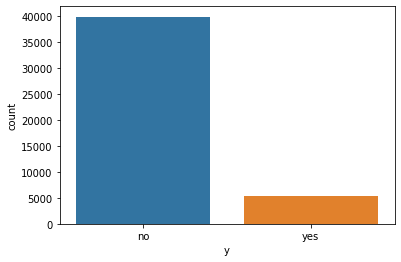

In [60]:
import seaborn as sns
sns.countplot(x='y',data=df)

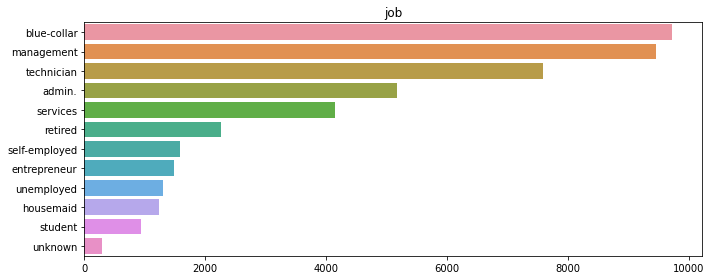

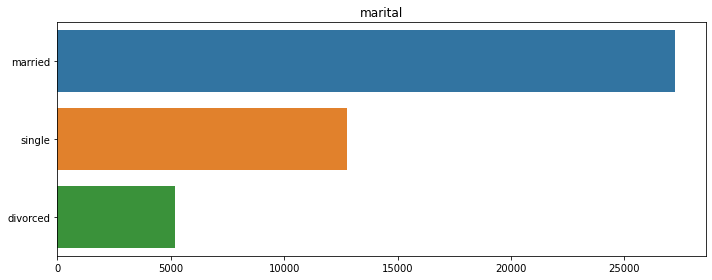

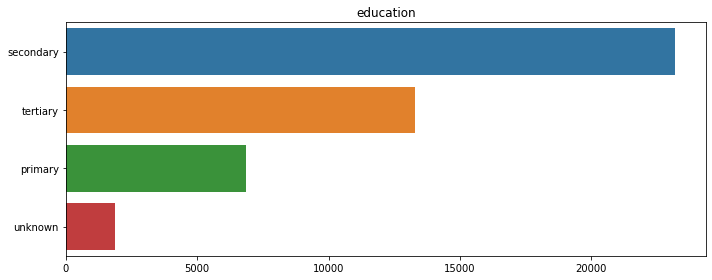

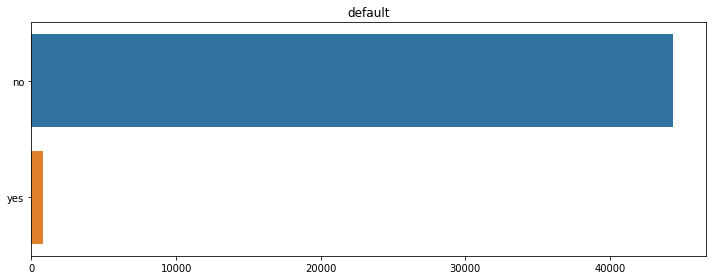

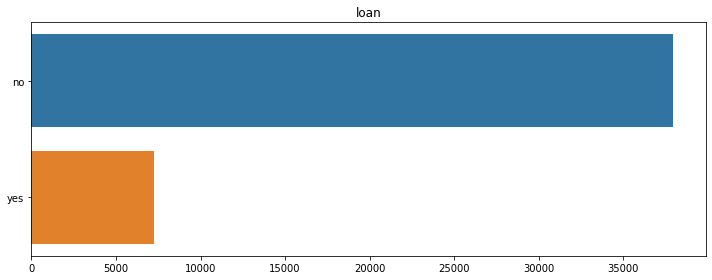

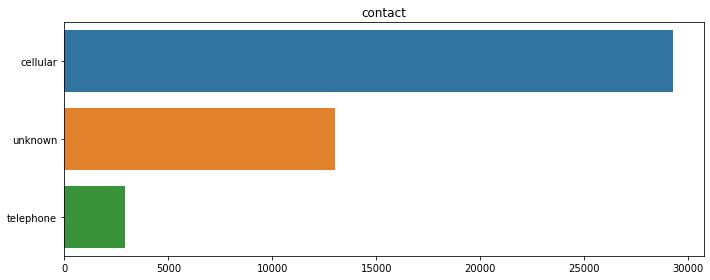

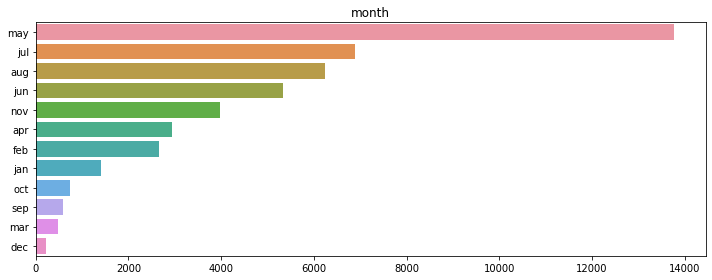

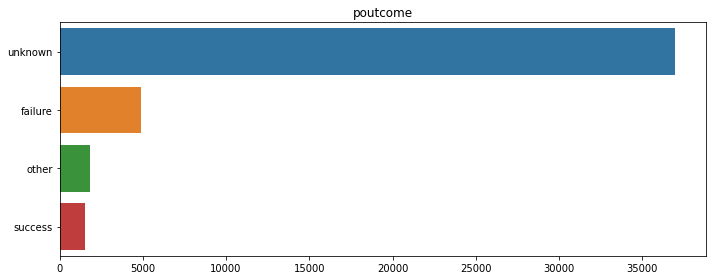

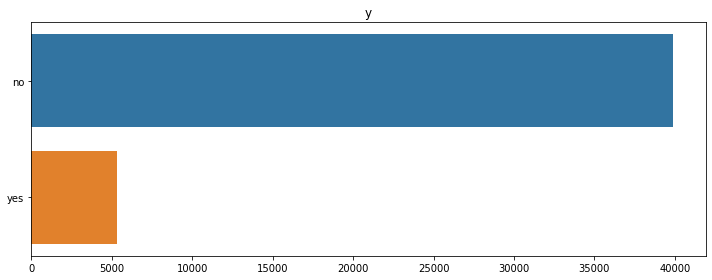

In [61]:
categorcial_variables = ['job', 'marital', 'education', 'default', 'loan', 'contact', 'month', 'poutcome','y']
for col in categorcial_variables:
    plt.figure(figsize=(10,4))
    sns.barplot(df[col].value_counts().values, df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

In [62]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [63]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [64]:
d1=df.copy()
d2=d1[d1.y=='yes']
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
d1=pd.concat([d1, d2])
data=d1

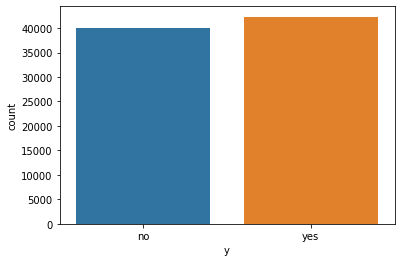

In [65]:
sns.countplot(x='y',data=d1)

In [66]:
d1.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

In [67]:
d1.shape

(82234, 17)

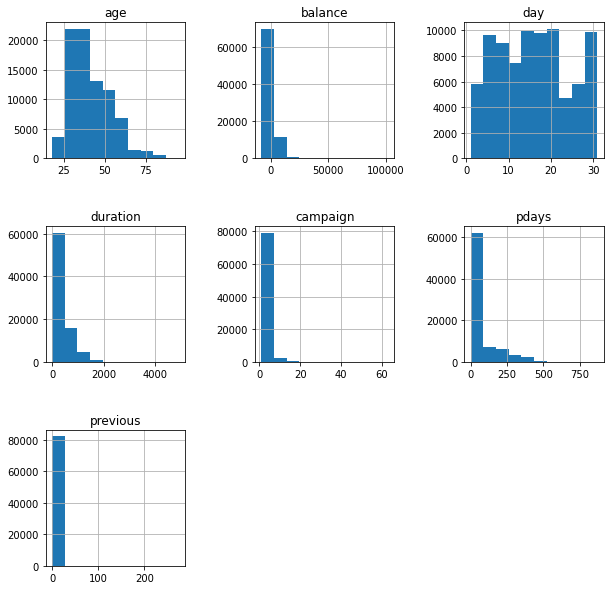

In [68]:
col = ['age','balance','day','duration','campaign','pdays','previous']
d1.hist(column=col,figsize=(10,10))
plt.subplots_adjust(wspace = 0.5, hspace = 0.5)
plt.show()

In [69]:
d1.pdays.value_counts()

-1      60642
 92       819
 182      727
 91       651
 181      635
        ...  
 401        1
 413        1
 531        1
 701        1
 530        1
Name: pdays, Length: 559, dtype: int64

In [70]:
d1.previous.value_counts()

0      60642
1       6853
2       5298
3       3200
4       1911
5       1306
6        858
7        583
8        402
9        260
10       249
11       170
12       114
13       101
14        54
17        36
15        27
19        25
23        15
20        15
22        13
16        13
21        11
29        11
30        10
26         9
55         8
58         8
18         6
27         5
24         5
25         4
37         2
28         2
38         2
275        1
51         1
32         1
40         1
35         1
41         1
Name: previous, dtype: int64

In [71]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [72]:
idx_numeric=[0,5,9,11,12,13,14]
scaler = MinMaxScaler()
d1[d1.columns[idx_numeric]] = scaler.fit_transform(d1[d1.columns[idx_numeric]])

In [73]:
d1.poutcome.value_counts()

unknown    60661
failure     9227
success     8357
other       3989
Name: poutcome, dtype: int64

In [74]:
d1.default.value_counts()

no     81055
yes     1179
Name: default, dtype: int64

In [75]:
d1.housing.value_counts()

no     43559
yes    38675
Name: housing, dtype: int64

In [76]:
d1.loan.value_counts()

no     71602
yes    10632
Name: loan, dtype: int64

In [77]:
d1['poutcome'] = d1['poutcome'].map({'failure': -1,'unknown': 0,'other':1,'success': 2,})
d1['default'] = d1['default'].map({'yes': -1,'no': 1})
d1['housing'] = d1['housing'].map({'yes': -1,'no': 1})
d1['loan'] = d1['loan'].map({'yes': -1,'no': 1})

In [78]:
# One hot encoding of nominal varibles
nominal = ['job','marital','education','contact','month']
dataProcessed = pd.get_dummies(d1,columns=nominal)
dataProcessed['y']=dataProcessed['y'].map({'yes': 1,'no': 0})
dataProcessed.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,1,0.092259,-1,1,0.133333,0.053070,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,1,0.073067,-1,1,0.133333,0.030704,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,1,0.072822,-1,-1,0.133333,0.015453,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,1,0.086476,-1,1,0.133333,0.018707,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,1,0.072812,1,1,0.133333,0.040260,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [79]:
dataProcessed.shape

(82234, 46)

In [80]:
from google.colab import files
dataProcessed.to_csv('preprocessed.csv',index=False) 
files.download('preprocessed.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [81]:
from sklearn.model_selection import train_test_split

In [82]:
data = pd.read_csv("preprocessed.csv")
data.head()

,age,default,balance,housing,loan,day,duration,campaign,pdays,previous,...,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep
0,0.519481,1,0.092259,-1,1,0.133333,0.053070,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
1,0.337662,1,0.073067,-1,1,0.133333,0.030704,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
2,0.194805,1,0.072822,-1,-1,0.133333,0.015453,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
3,0.376623,1,0.086476,-1,1,0.133333,0.018707,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0
4,0.194805,1,0.072812,1,1,0.133333,0.040260,0.0,0.0,0.0,...,0,0,0,0,0,0,1,0,0,0


In [83]:
X = data.drop('y', axis=1).values
y = data['y'].values

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [85]:
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(57563, 45) (57563,) (24671, 45) (24671,)


# DNN model

In [86]:
import torch

In [87]:
X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))

In [88]:
X_train.shape

torch.Size([57563, 45])

In [89]:
y_train.shape

torch.Size([57563])

In [98]:
y_train = y_train.view(y_train.shape[0],1)
y_test = y_test.view(y_test.shape[0],1)

In [99]:
y_train.shape

torch.Size([57563, 1])

In [92]:
from torch.utils.data import TensorDataset,DataLoader

In [100]:
train_loader = TensorDataset(DataLoader(X_train.float(),y_train),
                             batch_size=np.int(32),
                             shuffle=True,drop_last=True)
test_loader = TensorDataset(DataLoader(X_test.float(),y_test),batch_size=np.int(32),
                            shuffle=False,drop_last=True)

ValueError: ignored

In [102]:
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.nn.modules import dropout

In [124]:
class logistic(nn.Module):
  def __init__(self):
    super(logistic,self).__init__()
    self.h1 = nn.Linear(in_features=45,out_features=16)
    self.dropout = nn.Dropout(p=0.3)
    self.bn = nn.BatchNorm1d(num_features=16)
    self.h2 = nn.Linear(in_features=16,out_features=8)
    self.out = nn.Linear(in_features=8,out_features=1)

  def forward(self,x):
    x = F.relu(self.h1(x))
    x = self.dropout(x)
    x = self.bn(x)
    x = F.relu(self.h2(x))
    x = F.relu(self.out(x))
    return x


In [125]:
model = logistic()

In [126]:
list(model.parameters())

[Parameter containing:
 tensor([[-1.0965e-01,  9.0597e-02, -8.9299e-02,  1.1899e-01, -5.0905e-02,
          -2.7381e-02, -1.0849e-01, -2.3690e-02,  3.3404e-02,  2.2295e-02,
           3.0566e-02, -1.0143e-01,  5.6244e-02,  9.6059e-02, -1.1349e-01,
          -8.4913e-02,  1.1760e-01, -3.0646e-02, -4.2899e-03,  1.0131e-01,
          -2.0203e-02,  1.3588e-01,  7.8810e-02, -4.2307e-03,  1.0556e-01,
          -1.0191e-01, -2.9168e-02,  6.5370e-02, -7.7987e-02,  1.1310e-01,
          -9.0897e-02,  1.2545e-01,  1.3801e-01,  1.0732e-01,  6.3488e-02,
           3.1702e-02, -1.2323e-01, -7.0148e-02,  2.6137e-02,  1.0220e-01,
          -3.5010e-02,  4.4463e-02, -2.0514e-02, -1.4157e-01,  5.9154e-02],
         [-1.4277e-01,  1.3485e-01,  1.3089e-01,  1.1939e-01, -1.2141e-01,
          -1.1496e-01, -5.9414e-02,  1.3065e-01,  1.2962e-01,  4.3290e-02,
           1.0245e-01,  1.3507e-01, -1.4398e-01, -2.9645e-02, -9.5280e-02,
           1.0160e-02, -8.8198e-02,  1.1607e-01, -7.3248e-02,  5.5529e-02,
 

In [127]:
opt = Adam(model.parameters(),lr=0.01)

In [120]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

In [128]:
model = model.to(device)

In [129]:
for epoch in range(50):
  #forward pass and loss
  X_train=X_train.to(device) #batch is a tensor,(not numpy) so can be shifted to gpu
  y_train = y_train.to(device)
  y_pred = model(X_train)
  loss = F.binary_cross_entropy_with_logits(y_pred,y_train)

  #backward pass and update
  loss.backward()
  opt.step()

  #zero grad before new grad
  opt.zero_grad()

  if (epoch+1) % 5 == 0:
    print(f"epoch: {epoch+1}, Training loss: {loss.item():.4f}")


with torch.no_grad():
  X_test=X_test.to(device) #batch is a tensor,(not numpy) so can be shifted to gpu
  y_test = y_test.to(device)
  y_predicted= model(X_test)
  y_predicted_cls = y_predicted.round()
  acc = y_predicted_cls.eq(y_test).sum() / float(y_test.shape[0])
  print(f'accuracy: {acc.item():.4f}')

epoch: 5, Training loss: 0.6764
epoch: 10, Training loss: 0.6505
epoch: 15, Training loss: 0.6263
epoch: 20, Training loss: 0.6160
epoch: 25, Training loss: 0.6129
epoch: 30, Training loss: 0.6076
epoch: 35, Training loss: 0.6041
epoch: 40, Training loss: 0.5994
epoch: 45, Training loss: 0.5946
epoch: 50, Training loss: 0.5859
accuracy: 0.5710
